In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from config import *

In [2]:
num_samples = config['n_samples']
h_max = config['h_max']
n_steps = config['n_steps']
T = config['temp']

In [3]:
# take a single N value as an example
N = 4
filename = 'samples_' + str(N) + '.pkl'
with open(filename, 'rb') as f:
    W, mag_trajectories, M = pickle.load(f)

In [4]:
print('Average Work / Tlog(2): ', np.mean(W)/(T*np.log(2)))
print('Average Normalized Magnetization: ', M/(W.shape[0]*N*N))
print('Average exponentiated work (Jarzynski): ', np.mean(np.exp(-np.array(W)/T)))

Average Work / Tlog(2):  10.985030971459961
Average Normalized Magnetization:  -0.975209375
Average exponentiated work (Jarzynski):  0.5463254825948742


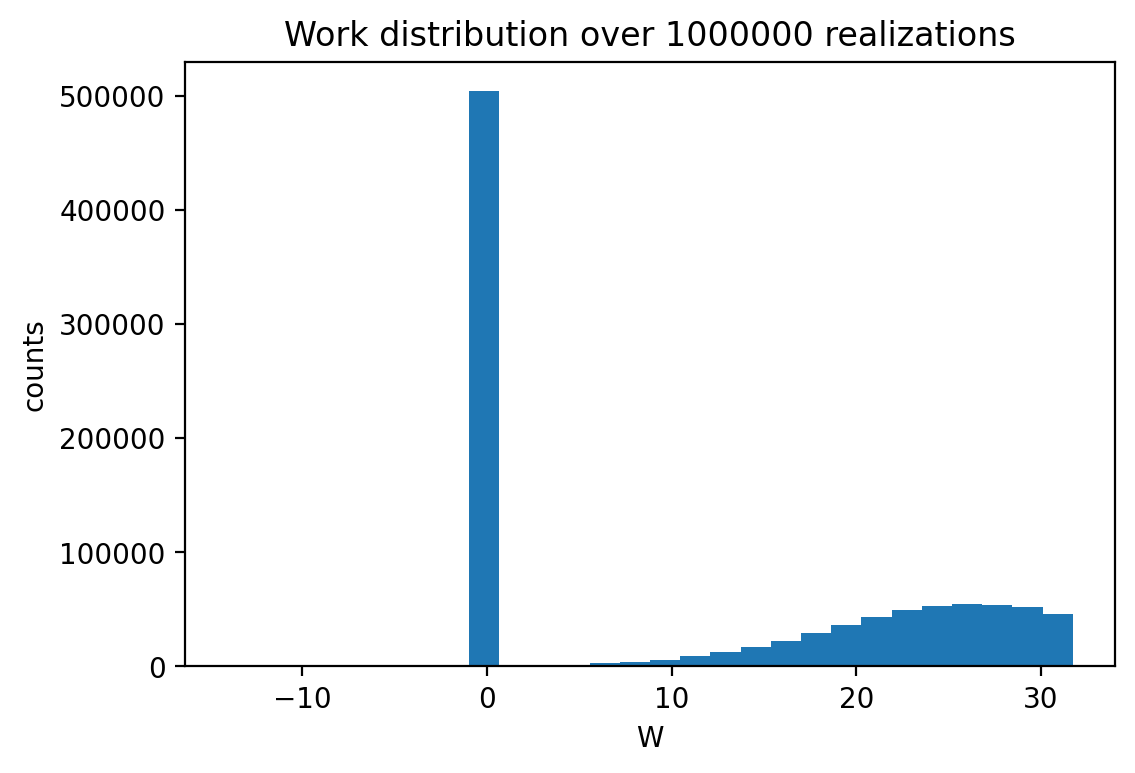

In [5]:
plt.figure(dpi=200)
plt.hist(W, bins='doane')
plt.xlabel('W')
plt.ylabel('counts')
plt.title('Work distribution over {0} realizations'.format(W.shape[0]))
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


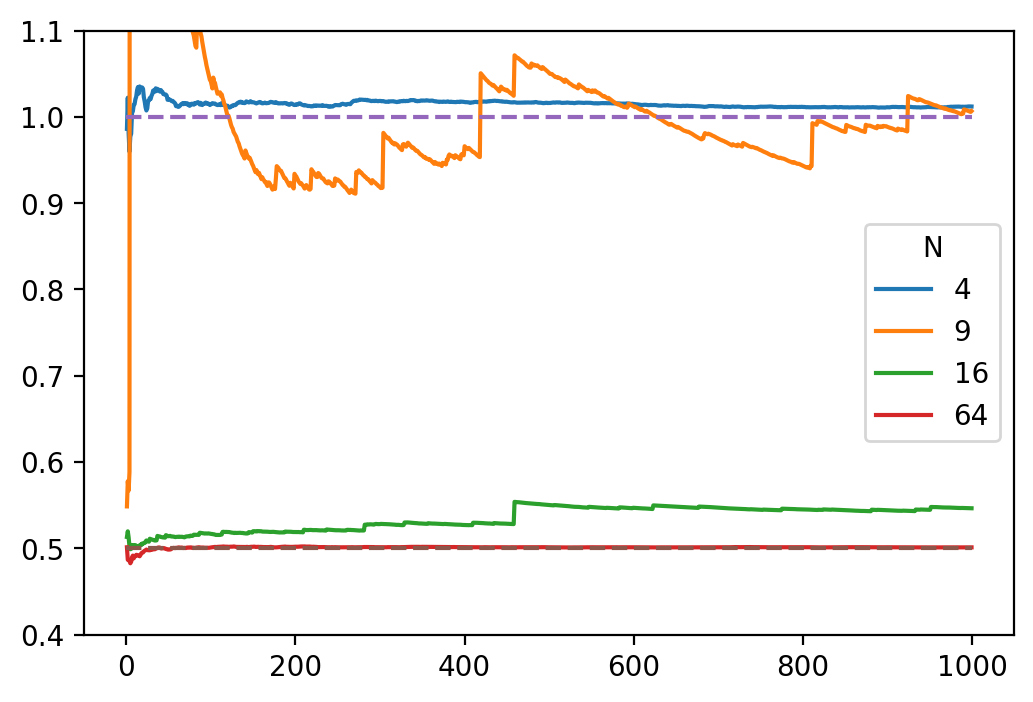

In [6]:
num_samples = W.shape[0]
plt.figure(dpi=200)

for N in [2,3,4,8]:
    filename = 'samples_' + str(N) + '.pkl'
    with open(filename, 'rb') as f:
        W, mag_trajectories, M = pickle.load(f)
    
    moving_avg = [np.mean(np.exp(-np.array(W)/(T))[:i]) for i in range(num_samples) if i%1000==0]
    plt.plot(moving_avg, label=str(int(N**2)))
    
plt.ylim(0.4, 1.1)
plt.legend(title='N')
plt.plot(np.ones_like(moving_avg), '--')
plt.plot(np.ones_like(moving_avg)*0.5, '--')
plt.show()